In [ ]:
''' NN from scratch (functional paradigm, heavily inspired by samson zhang)'''

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
data = pd.read_csv('datasets/shape_set_3-5.csv')
data = data[data.columns[1:]]
features = data.columns
data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_615,pixel_616,pixel_617,pixel_618,pixel_619,pixel_620,pixel_621,pixel_622,pixel_623,pixel_624
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,255,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
'''convert to np array and shuffle'''
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)
print("shape =", m,n)

shape = 10001 626


In [36]:
''' split into train and test'''
data_dev = data[0:1000].T # want to have columns = examples, rows = features
y_dev = data_dev[0] -3 # -3 bc labels are 345 which causes problems
X_dev = data_dev[1:]
X_dev = X_dev / 255
print(y_dev.shape, X_dev.shape) ## The X matrix should have each column be a training example,
### rows are features

data_train = data[1000:].T
y_train = data_train[0] -3
X_train = data_train[1:]
X_train = X_train / 255
print(y_train.shape, X_train.shape)

(1000,) (625, 1000)
(9001,) (625, 9001)


In [20]:
''' we are making a NN with 1 hidden layer. So the number of nodes per layer is 
    625 (input layer), 24 (hidden layer), 10 (output/classification layer)'''
def init_params(input_nodes, hidden_nodes, output_classes):
    W1 = np.random.rand(hidden_nodes, input_nodes) - 0.5 #nrows = nodes in hidden layer, ncols = input nodes
    b1 = np.random.rand(hidden_nodes, 1) - 0.5 # number of nodes in hidden layer
    W2 = np.random.rand(output_classes, hidden_nodes) - 0.5 #nrows = nodes in output layer, ncols = hidden nodes
    b2 = np.random.rand(output_classes, 1) - 0.5 # number of nodes in output layer
    return W1, b1, W2, b2
    
def ReLU(inputs):
    return np.maximum(inputs, 0)

def softmax(inputs):
    return np.exp(inputs) / sum(np.exp(inputs))

def softmax(inputs):
    shift = inputs - np.max(inputs)
    exps = np.exp(shift)
    return exps / sum(exps)

def one_hot(inputs):
    one_hot_Y = np.zeros((inputs.size, inputs.max() + 1))
    one_hot_Y[np.arange(inputs.size), inputs] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1 #np.array.dot does dot product
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z>0
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot(Y)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

In [21]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(X, y, iterations, alpha):
    W1, b1, W2, b2 = init_params(input_nodes = 625, hidden_nodes = 24, output_classes = 3)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 100 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), y))
    return W1, b1, W2, b2

In [56]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, iterations = 500, alpha = 0.1)

Iteration:  0
[1 1 0 ... 0 0 1] [0 1 2 ... 2 2 2]
Accuracy:  0.3539606710365515
Iteration:  100
[0 1 1 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.7851349850016665
Iteration:  200
[0 1 2 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.824908343517387
Iteration:  300
[0 1 2 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.8590156649261194
Iteration:  400
[0 1 2 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.8824575047216976


In [57]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((25, 25)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
def test_prediction_oos(index, W1, b1, W2, b2, plot = True):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = y_dev[index]
    if plot:
        print("Prediction: ", prediction)
        print("Label: ", label)
        current_image = current_image.reshape((25, 25)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
    else:
        return [prediction, label]

In [58]:
random_sample = list(range(X_dev.shape[1]))
random.shuffle(random_sample)

accuracy = []
for idx in random_sample:
    pred, label = test_prediction_oos(idx, W1, b1, W2, b2, plot = False)
    accuracy.append(pred == label)
print(f"classification accuracy in test set: {np.mean(accuracy)}")

classification accuracy in test set: 0.889


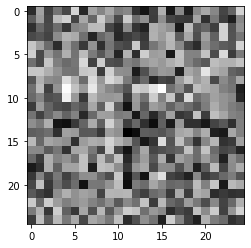

<Figure size 432x288 with 0 Axes>

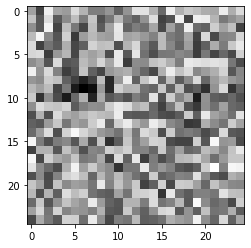

<Figure size 432x288 with 0 Axes>

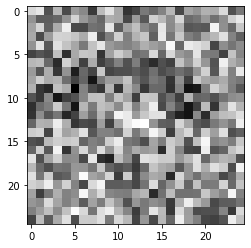

<Figure size 432x288 with 0 Axes>

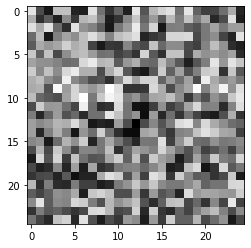

<Figure size 432x288 with 0 Axes>

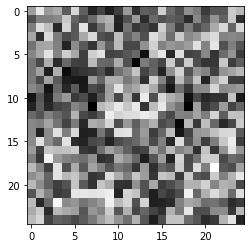

<Figure size 432x288 with 0 Axes>

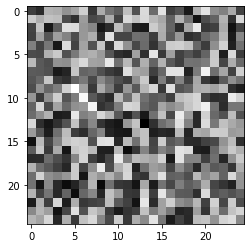

<Figure size 432x288 with 0 Axes>

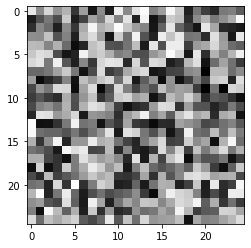

<Figure size 432x288 with 0 Axes>

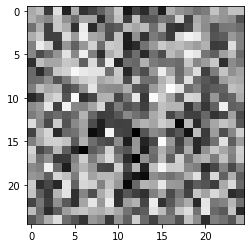

<Figure size 432x288 with 0 Axes>

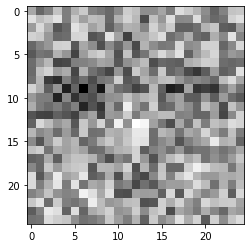

<Figure size 432x288 with 0 Axes>

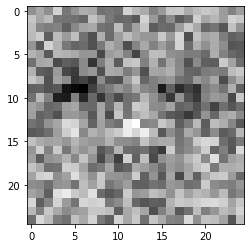

<Figure size 432x288 with 0 Axes>

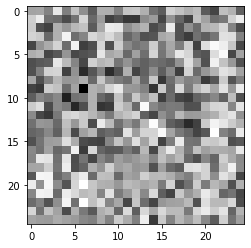

<Figure size 432x288 with 0 Axes>

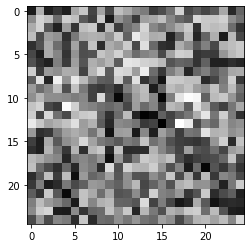

<Figure size 432x288 with 0 Axes>

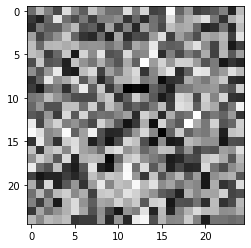

<Figure size 432x288 with 0 Axes>

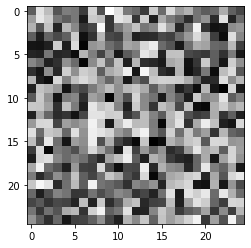

<Figure size 432x288 with 0 Axes>

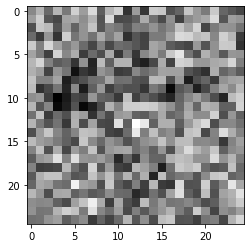

<Figure size 432x288 with 0 Axes>

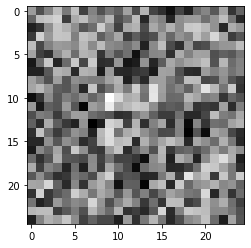

<Figure size 432x288 with 0 Axes>

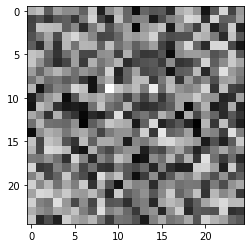

<Figure size 432x288 with 0 Axes>

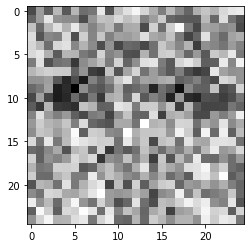

<Figure size 432x288 with 0 Axes>

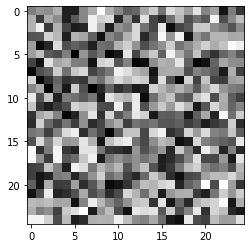

<Figure size 432x288 with 0 Axes>

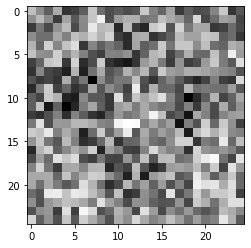

<Figure size 432x288 with 0 Axes>

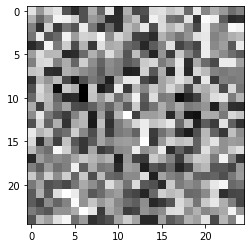

<Figure size 432x288 with 0 Axes>

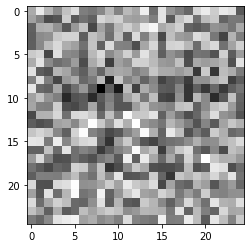

<Figure size 432x288 with 0 Axes>

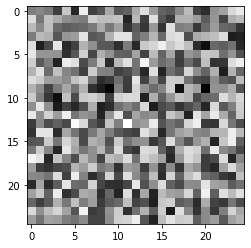

<Figure size 432x288 with 0 Axes>

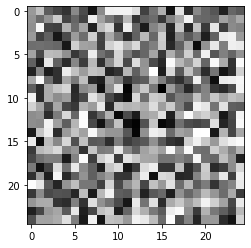

<Figure size 432x288 with 0 Axes>

In [59]:
''' visualize weights. each image is n^2 pixels, so there are n^2 weights 
connected to each nodein the hidden layer. if we reshape these nodes we can see 
which regions of each image the hidden nodes are "looking at" most closely
'''
for i in range(24):
    current_image = W1[i,:].T
    current_image = current_image.reshape((25, 25)) * 255
    plt.figure()
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    plt.clf()

In [37]:
''' initialize weights with shape images'''
def gradient_descent_special(X, y, iterations, alpha):
    '''
    same as other gradient descent function, but the weights 
    connecting the input to the hidden layer are initialised using images 
    from the test dataset. The images have many zeros which can result in dead neurons,
    so the image is reduced in contrast and random noise is added'''
    _, b1, W2, b2 = init_params(input_nodes = 625, hidden_nodes = 24, output_classes = 3)
    # initialize weights as shapes
    # ensure equal representation of each class
    zeros = list(np.where(np.array(y_dev) == 0)[0][:8])
    ones = list(np.where(np.array(y_dev) == 1)[0][:8])
    twos = list(np.where(np.array(y_dev) == 2)[0][:8])
    initial_weights = X_dev.T[zeros + ones + twos]
    
    W1 = initial_weights / 3 + np.random.randn(*X_dev.T[0:24].shape) * 0.01
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % 200 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), y))
    return W1, b1, W2, b2

In [50]:
W1, b1, W2, b2 = gradient_descent_special(X_train, y_train, iterations = 1500, alpha = 0.01)
# ^^ note more training steps and lower alphs, this set of initial weights led to 
# dead neurons with alpha = 0.1 as before, so we need to lower learning rate 
# in order to successfully train this network

Iteration:  0
[0 1 1 ... 1 1 1] [0 1 2 ... 2 2 2]
Accuracy:  0.4303966225974892
Iteration:  200
[0 1 1 ... 1 1 1] [0 1 2 ... 2 2 2]
Accuracy:  0.5882679702255305
Iteration:  400
[0 1 1 ... 1 1 1] [0 1 2 ... 2 2 2]
Accuracy:  0.4800577713587379
Iteration:  600
[0 1 1 ... 1 1 1] [0 1 2 ... 2 2 2]
Accuracy:  0.7059215642706366
Iteration:  800
[0 1 1 ... 1 1 2] [0 1 2 ... 2 2 2]
Accuracy:  0.821353182979669
Iteration:  1000
[0 1 1 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.866237084768359
Iteration:  1200
[0 1 1 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.8843461837573603
Iteration:  1400
[0 1 1 ... 2 2 2] [0 1 2 ... 2 2 2]
Accuracy:  0.8943450727696922


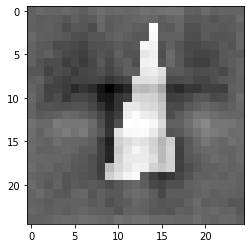

<Figure size 432x288 with 0 Axes>

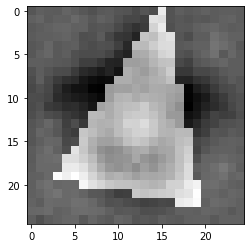

<Figure size 432x288 with 0 Axes>

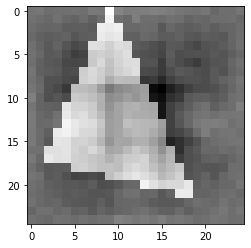

<Figure size 432x288 with 0 Axes>

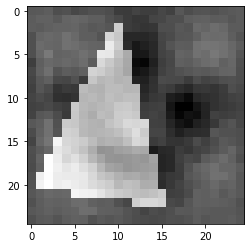

<Figure size 432x288 with 0 Axes>

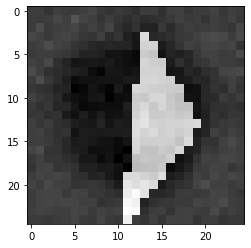

<Figure size 432x288 with 0 Axes>

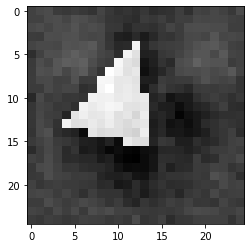

<Figure size 432x288 with 0 Axes>

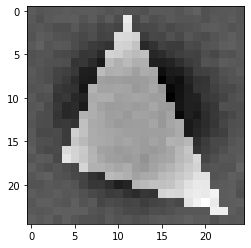

<Figure size 432x288 with 0 Axes>

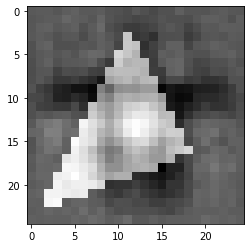

<Figure size 432x288 with 0 Axes>

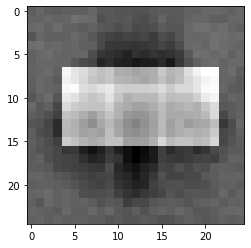

<Figure size 432x288 with 0 Axes>

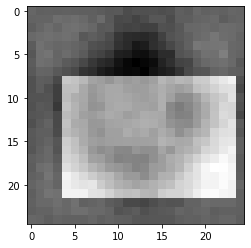

<Figure size 432x288 with 0 Axes>

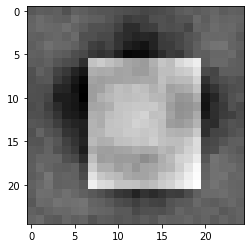

<Figure size 432x288 with 0 Axes>

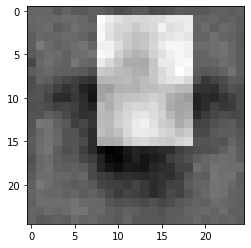

<Figure size 432x288 with 0 Axes>

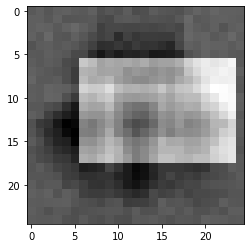

<Figure size 432x288 with 0 Axes>

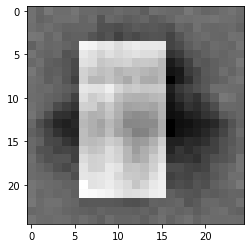

<Figure size 432x288 with 0 Axes>

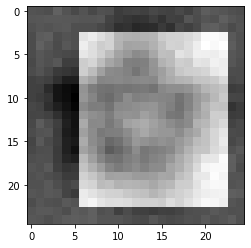

<Figure size 432x288 with 0 Axes>

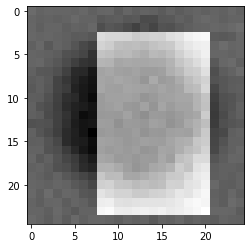

<Figure size 432x288 with 0 Axes>

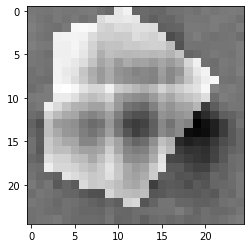

<Figure size 432x288 with 0 Axes>

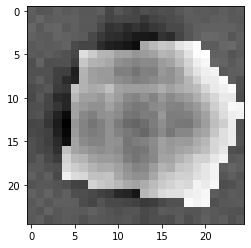

<Figure size 432x288 with 0 Axes>

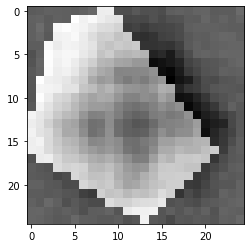

<Figure size 432x288 with 0 Axes>

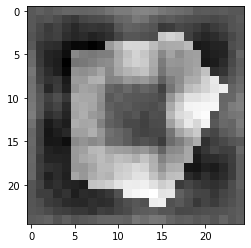

<Figure size 432x288 with 0 Axes>

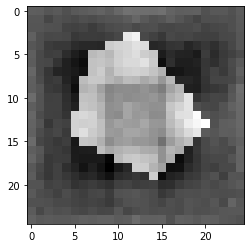

<Figure size 432x288 with 0 Axes>

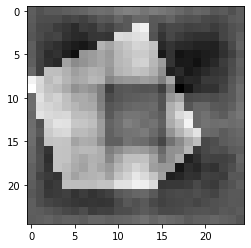

<Figure size 432x288 with 0 Axes>

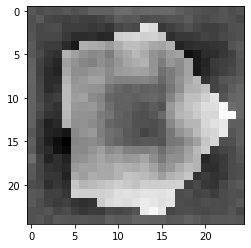

<Figure size 432x288 with 0 Axes>

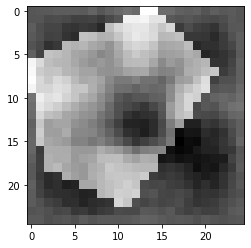

<Figure size 432x288 with 0 Axes>

In [51]:

''' visualize weights. each image is n^2 pixels, so there are n^2 weights 
connected to each nodein the hidden layer. if we reshape these nodes we can see 
which regions of each image the hidden nodes are "looking at" most closely
'''
for i in range(24):
    current_image = W1[i,:].T
    current_image = current_image.reshape((25, 25)) * 255
    plt.figure()
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    plt.clf()

In [52]:
'''super cool that here is another viable* set of weights that resembles recognizable shapes.
Makes you wonder how many local minima exist in the loss function for this network'''

accuracy = []
for idx in list(range(X_dev.shape[1])):
    pred, label = test_prediction_oos(idx, W1, b1, W2, b2, plot = False)
    accuracy.append(pred == label)
print(f"classification accuracy in test set: {np.mean(accuracy)}")

classification accuracy in test set: 0.894


In [53]:
''' prediction: the strongest weights connecting the hidden layer to the output layer
will correspond to hidden nodes with initial weights in the shape of the corresponding output
node (eg: first output node is responsible for labeling triangles accordingly; it will be 
connected to triangle-informed hidden nodes)'''

#visualize last layer weights and store brightest nodes
brightest_nodes = [[],[],[]]

for i in range(3):
    current_image = W2[i,:].T.flatten()
    brightest_nodes[i] = np.argsort(current_image)[-6:][::-1]
    
#extract brightest nodes from each
print(brightest_nodes)

[array([ 7,  3, 11, 14, 21,  5]), array([10,  8, 16,  9,  1, 12]), array([23, 21, 19, 22, 12, 20])]


weights that most influence node 0 (triangle)


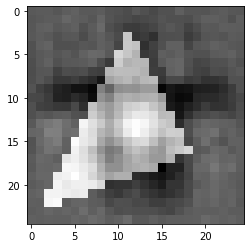

<Figure size 432x288 with 0 Axes>

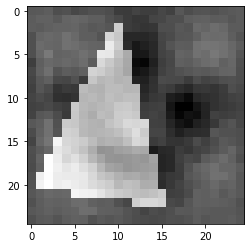

<Figure size 432x288 with 0 Axes>

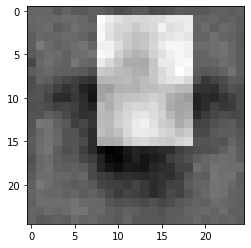

<Figure size 432x288 with 0 Axes>

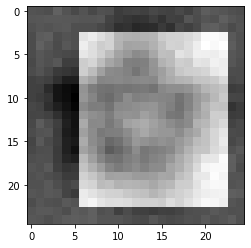

<Figure size 432x288 with 0 Axes>

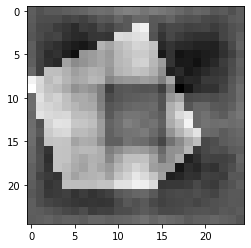

<Figure size 432x288 with 0 Axes>

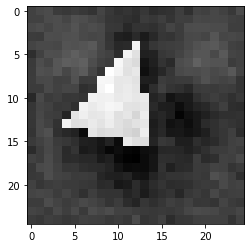

weights that most influence node 1 (rectangle)


<Figure size 432x288 with 0 Axes>

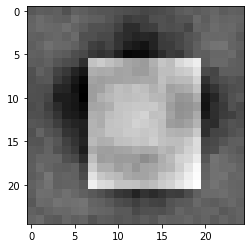

<Figure size 432x288 with 0 Axes>

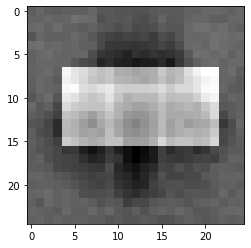

<Figure size 432x288 with 0 Axes>

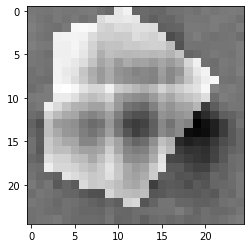

<Figure size 432x288 with 0 Axes>

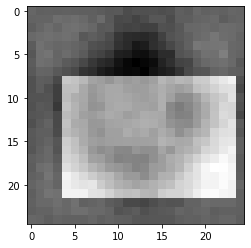

<Figure size 432x288 with 0 Axes>

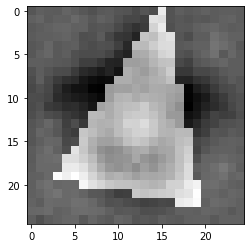

<Figure size 432x288 with 0 Axes>

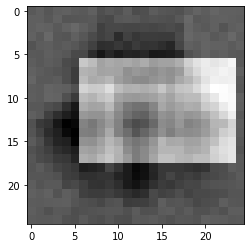

weights that most influence node 2 (pentagon)


<Figure size 432x288 with 0 Axes>

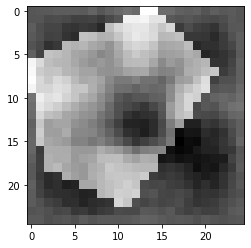

<Figure size 432x288 with 0 Axes>

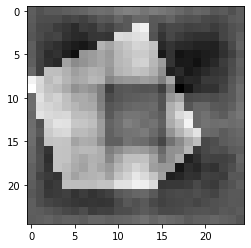

<Figure size 432x288 with 0 Axes>

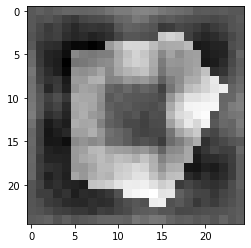

<Figure size 432x288 with 0 Axes>

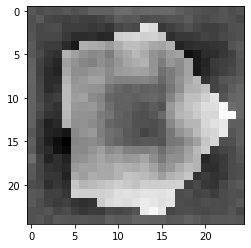

<Figure size 432x288 with 0 Axes>

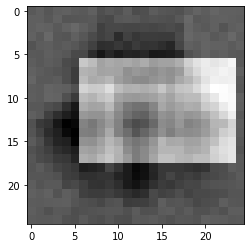

<Figure size 432x288 with 0 Axes>

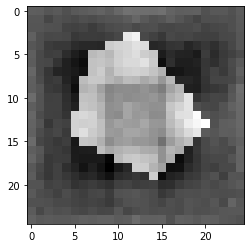

<Figure size 432x288 with 0 Axes>

In [54]:
shapes = ['triangle', 'rectangle', 'pentagon']
for i in range(3):
    print(f"weights that most influence node {i} ({shapes[i]})")
    for j in brightest_nodes[i]:
        current_image = W1[j,:].T
        current_image = current_image.reshape((25, 25)) * 255
        plt.figure()
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
        plt.clf()


In [55]:
''' so not perfect: but is there a significant association between 
weight shape and output node?'''
from scipy.stats import chi2_contingency
# Observed frequencies by visual inspection

# for triangle output:
observed_shapes_0 = [3, 2, 1] 
# for rectangle output:
observed_shapes_1 = [1, 4, 1]
# for pentagon output:
observed_shapes_2 = [0, 1, 5]

total_observed = np.array([observed_shapes_0, observed_shapes_1, observed_shapes_2])

# Perform Chi-Square test
_, p_value, _, _ = chi2_contingency(total_observed)

# Results
print(p_value)

0.0392415132537981
